# &#x1F4DD; REPORT

# Homework &#x0031;&#xFE0F;&#x20E3; 

Homework policy: the homework is individual. Students are encouraged to discuss with fellow students to try to find the main structure of the solution for a problem, especially if they are totally stuck at the beginning of the problem. However, you should work out the details yourself and write down in your own words only what you understand yourself.

&#x1F516; **(&#x2172;)** In Matlab, you will generate n = 100 measurements of the roundtrip delay between your PC and a host machine of your choice (preferably a host that is not too close by). The roundtrip delay can be measured using the Unix command ping. The generation of 100 measurements, put into a vector that can be processed by Matlab, can be done by running the following command in Matlab

$$Y=pingstats(’machine’,100,’v’);$$

for which the file pingstats.m has been distributed by email (put pingstats.m in the directory in which you launch Matlab; the comments in the file pingstats.m contain a suggestion for a machine (host) to ping, but you are encouraged to try other hosts, see e.g. the (probably totally outdated) file hw host ip list.txt which was also distributed by email, or search for a host by yourself).

In [1]:
using Printf
using Plots; gr()

Plots.GRBackend()

&#x1F516; The file pingstats.m (and the command pingstats) works on Windows and Linux machines. In your HW report, please indicate which host you used.

In [2]:
include("pingstats.jl");

The `pingstats.jl` source code is written in the [Julia Language](https://julialang.org/) and can run on any plaftorms that run Julia, which includes Windows, Linux (including Raspbian - Raspberry Pi) and MacOS (Intel or M1-M2 Silicon Chips). The below function has been translated by ChatGPT from Matlab to Julia.

```julia
function pingstats(machine::String, num::Int, verbose::String)
    out = Vector{Float64}(undef, num)
    
    for i in 1:num
        cmd = is_windows() ? `ping $machine -n 1` : `ping $machine -c 1 -s 64 -i 1`
        output, err, code = execute(`$cmd`)
        
        if occursin("time=", output)
            found = match(r"time=(\d+(?:\.\d+)?) ms", output)
            if found !== nothing
                time_ms = parse(Float64, found.captures[1])
                out[i] = time_ms
                if verbose != ""
                    @printf("Ping %d\n", i)
                end
            end
        end
    end
    
    return out
end
```

In [3]:
server = "isl.stanford.edu";
N = 100; # Number of samples

In [4]:
# Example usage:
# stats = pingstats("isl.stanford.edu", 100, "v")
# or
# stats = pingstats("www.google.com", 100, "v")
stats = pingstats(server, N, "");

### &#x1F4E6; Save Data in a file

In [33]:
open("stats.txt", "w") do file
    write(file, "pingstats", "\n")
    for i in 1:size(stats, 1)
        # Join elements of each row with a space and write to the file
        write(file, join(stats[i, :], " "), "\n")
    end
end

&#x27A1; Link to [`stats.txt`](stats.txt)

In [34]:
using DataFrames, CSV

In [40]:
df = CSV.File("stats.txt") |> DataFrame;

In [41]:
using PrettyTables

In [42]:
header = (
      ["pingstats"]
    , ["[Float64]"]
);

In [43]:
pretty_table(
    first(df, 3)
    , backend=Val(:html), header = header, standalone=true)

pingstats
[Float64]
158.991
152.726
152.736


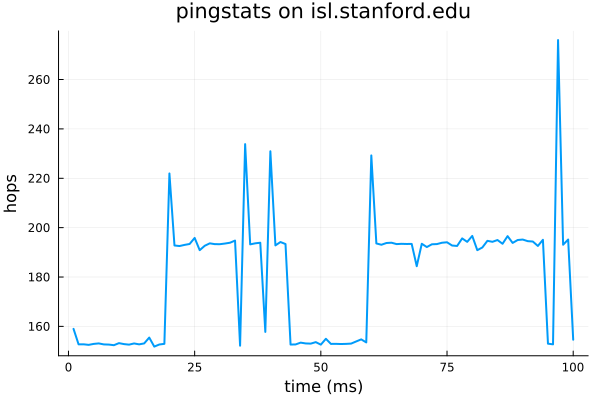

In [46]:
@df df plot(
    [:pingstats]
    , title = "pingstats on $server"
    , xlabel = "time (ms)"
    , ylabel = "hops"
    , label = :none
    , linewidth = 2
)

In [10]:
using StatsPlots

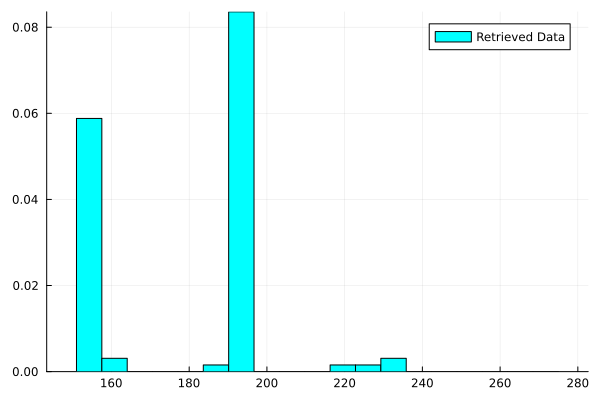

In [11]:
# Select the variable for which you want to plot the marginal density
variable_index = 1  # Index of the variable (1 for the first variable, 2 for the second)
selected_variable = stats[:, variable_index];
# Plot the marginal density using a histogram
b_range = range(trunc(Int, minimum(stats)), trunc(Int, maximum(stats)), length=20)
histogram(stats, label="Retrieved Data", bins=b_range, normalize=:pdf, color=:Cyan)

# &#x1F4DA; References
